# Predicting heart disease using machine learning (Classification)

This notebook tries to predict the heart disease in patients based on other health conditions using Sci Kit Learn tools. It is an example of end-to-end workflow on classification type of problem, binary in this case.

I will go through the following steps:

1. Problem definition
2. Data source
3. Evaluation metrics
4. Features
5. Model choice and training
6. Experimentation

## 1. Problem definition

In a statement, the question to be answered is:
> Given clinical parameters, can we predict whether a person will have aheart disease or not?

This is a binary classification problem (disease or no disease), we I'll use existing health data on people with diagnosed heart disease to train the model so that it predict disease in non-diagnosed patients, based on those health parameters. 

## 2. Data source

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, a formatted way is available from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/). Clearly, it is a structured type of data, and the problem is suitable for supervised learning.

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**, **independent variables**) are the variables which I'll use to predict the **target variable** (**dependent variable**).



## 3. Evaluation metrics

> Ideally I'd want to reach 95% accuracy for our model, however I'll look into other metrics too.

## 4. Features

The info about the features used for modelling is presented in the data dictionary below.

### Heart Disease Data Dictionary
The following are the features are used to predict the target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

## Preparing the tools

I'll import Pandas, Matplotlib and NumPy for analysis and manipulation as well as some Scikit-learn models and tools

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

#Import models from Scikit-Learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve

## Load data

In [4]:
df = pd.read_csv("data/hd.csv")
df.shape

(303, 14)

## EDA (exploratory data analysis)

1. What question is to be answered
2. What kind of data is available
3. What's missing and how to deal with it
4. Where are outliers and what to do with them
5. How can you add change or remove features to get more out of data

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.target.value_counts() # a relatively balanced problem

1    165
0    138
Name: target, dtype: int64

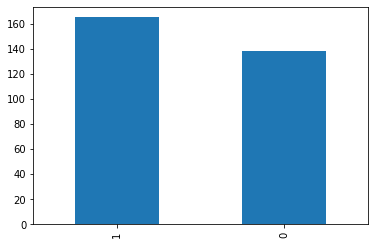

In [7]:
df.target.value_counts().plot(kind="bar");

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum() #no missing values, which is super helpful

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease according to Sex

In [4]:
df.sex.value_counts()

NameError: name 'df' is not defined

In [13]:
pd.crosstab(df.target,df.sex) #more healthy males than females

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text xticklabel objects>)

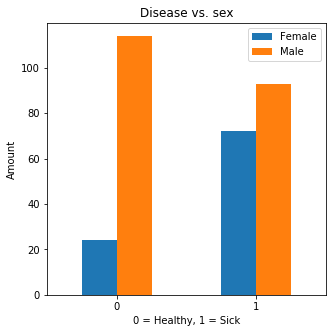

In [19]:
#Let's plot it really fast
pd.crosstab(df.target,df.sex).plot(kind="bar", figsize=(5,5))
plt.title("Disease vs. sex")
plt.xlabel("0 = Healthy, 1 = Sick")
plt.ylabel("Number of people")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

### Age vs max HR for heart disease

(array([20., 30., 40., 50., 60., 70., 80.]),
 <a list of 7 Text xticklabel objects>)

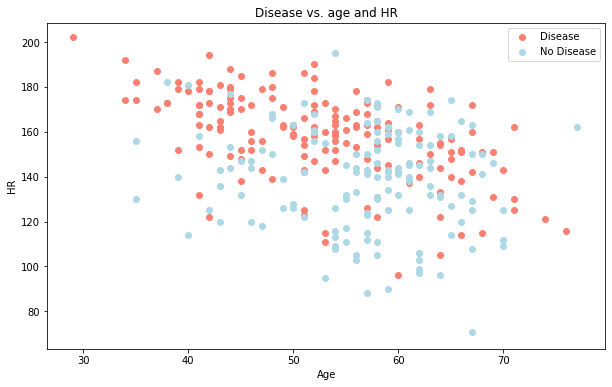

In [23]:
plt.figure(figsize=(10,6))

#Sick cases only
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c="salmon")
#Healthy cases only
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], c="lightblue")

plt.title("Disease vs. age and HR")
plt.xlabel("Age")
plt.ylabel("HR")
plt.legend(["Disease","No Disease"])
plt.xticks(rotation=0)

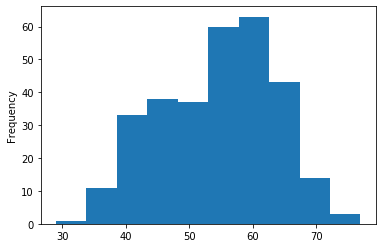

In [25]:
# Check age distribution
df.age.plot.hist();

### Heart disease frequency per Chest Pain Type
0 - typical
1 - atypical
2 - non-anginal pain
3 - asymptomatic

In [26]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


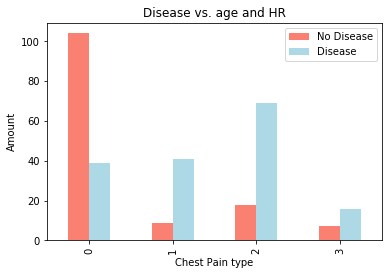

In [29]:
# More appealing demosntration
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["Salmon", "lightblue"])
plt.title("Disease vs. age and HR")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"]);

### Correlation matrix

In [31]:
# Correclation matrix to see how different parameters affec the target variable
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


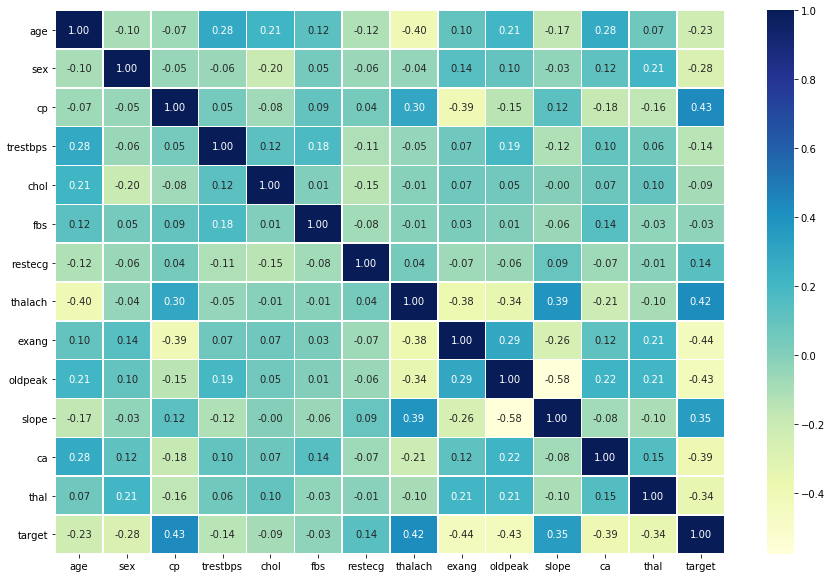

In [32]:
# More graphical presentation using seaborn package
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

## 5. Modelling

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
# prepare X, y followed by split into train and test

np.random.seed(42)

X  = df.drop("target", axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [41]:
# Put the chosen models in dictionary

models = {"logit": LogisticRegression(), "KNN":KNeighborsClassifier(), "Random Forest":RandomForestClassifier()}

#Create a helper function to fit and score models

def fit_score (models, X_train, X_test, y_train, y_test):
    """
    Simple function to use different models, train them and evaluate their score on the test dataset
    """
    
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [42]:
# Baseline fit of the models (using their default parameters) and see how they perform
model_scores = fit_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logit': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Random Forest and Logistic regression seem most promising, but I'll try all of them.

**Useful TODO list:**

* **Hyperparameter tuning** - Each model you use has a series of parameters that dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average. 
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - Combines precision and recall into one metric. 1 is best, 0 is worst.
* [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
* [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

## Hyperparameter tuning

In [44]:
# Tuning KNN classifier
train_scores = []
test_scores = []

# Create a list of different values for n_neighbours
neighbours = range(1,21)
knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    


In [45]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [46]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

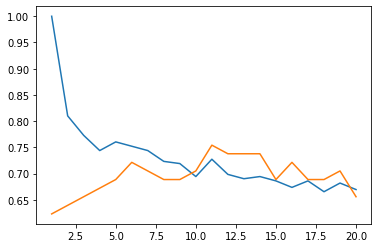

In [47]:
#best score for neighbours = 11
plt.plot(neighbours, train_scores, neighbours, test_scores)

In [48]:
max(test_scores)

0.7540983606557377

I'll drop KNN, still not good enough when it comes to accuracy, even after tuning

## Hyperparameter tuning with RandomizedSearchCV()

This function performs cross-validation training and evaluation using n random sets of parameters from pre-defined grid. 

We're going to tune:
* Logistic regression
* Random Forest Classifier

In [49]:
# Defining parameter grids for both models
grid_lr  ={
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"]
}

grid_rf = {
    "n_estimators": np.arange(10,1000,50),
    "max_depth": [None, 3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2)
    
}

In [51]:
# Tune logistics regression
np.random.seed(42)

rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                              param_distributions=grid_lr,
                              cv=5, #number of subsets the data will be split into (1 for validation, rest for training)
                              n_iter=20,
                              verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [52]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [53]:
rs_log_reg.score(X_test,y_test) #not too much improvement over initial fit

0.8852459016393442

## Tuning Random Forest

In [54]:
np.random.seed(42)

rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=grid_rf,
                              cv=5,
                              n_iter=20,
                              verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [55]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [56]:
rs_rf.score(X_test, y_test) #Improved a bit but still worse than the logistic regression

0.8688524590163934

Time to concentrate on logistic regression
## Now we'll use GridSearchCV()

This function checks all the parameter combinations from the provided grid, good for narrowed down parameter space.

In [58]:
#New grid
grid_lr2  ={
    "C": np.logspace(-4,4,30),
    "solver": ["liblinear", "saga","lbfgs"]
}


In [60]:
np.random.seed(42)

gs_log_reg= GridSearchCV(LogisticRegression(),
                              param_grid=grid_lr2,
                              cv=5,
                              verbose=2)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=saga ...........................................
[CV] ............................ C=0.0001, solver=saga, total=   0.0s
[CV] C=0.0001, solver=saga ...........................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=0.0001, solver=lbfgs, total=   0.0s
[CV] C=0.0001, solver=lbfgs ..........................................
[CV] ........................... C=0.0001, solver=lbfgs, total=   0.0s
[CV] C=0.0001, solver=lbfgs ..........................................
[CV] ........................... C=0.0001, solver=lbfgs, total=   0.0s
[CV] C=0.0001, solver=lbfgs ..........................................
[CV] ........................... C=0.0001, solver=lbfgs, total=   0.0s
[CV] C=0.0001, solver=lbfgs ..........................................
[CV] ........................... C=0.0001, solver=lbfgs, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=0.00018873918221350977, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=0.00018873918221350977, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

[CV] ............ C=0.00018873918221350977, solver=saga, total=   0.0s
[CV] C=0.00018873918221350977, solver=saga ...........................
[CV] ............ C=0.00018873918221350977, solver=saga, total=   0.0s
[CV] C=0.00018873918221350977, solver=saga ...........................
[CV] ............ C=0.00018873918221350977, solver=saga, total=   0.0s
[CV] C=0.00018873918221350977, solver=lbfgs ..........................
[CV] ........... C=0.00018873918221350977, solver=lbfgs, total=   0.0s
[CV] C=0.00018873918221350977, solver=lbfgs ..........................
[CV] ........... C=0.00018873918221350977, solver=lbfgs, total=   0.0s
[CV] C=0.00018873918221350977, solver=lbfgs ..........................
[CV] ........... C=0.00018873918221350977, solver=lbfgs, total=   0.0s
[CV] C=0.00018873918221350977, solver=lbfgs ..........................
[CV] ........... C=0.00018873918221350977, solver=lbfgs, total=   0.0s
[CV] C=0.00018873918221350977, solver=lbfgs ..........................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean


[CV] C=0.0003562247890262444, solver=lbfgs ...........................
[CV] ............ C=0.0003562247890262444, solver=lbfgs, total=   0.0s
[CV] C=0.0003562247890262444, solver=lbfgs ...........................
[CV] ............ C=0.0003562247890262444, solver=lbfgs, total=   0.0s
[CV] C=0.0003562247890262444, solver=lbfgs ...........................
[CV] ............ C=0.0003562247890262444, solver=lbfgs, total=   0.0s
[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=liblinear, total=   0.0s
[CV] 

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

[CV] ............. C=0.0006723357536499335, solver=saga, total=   0.0s
[CV] C=0.0006723357536499335, solver=saga ............................
[CV] ............. C=0.0006723357536499335, solver=saga, total=   0.0s
[CV] C=0.0006723357536499335, solver=saga ............................
[CV] ............. C=0.0006723357536499335, solver=saga, total=   0.0s
[CV] C=0.0006723357536499335, solver=lbfgs ...........................
[CV] ............ C=0.0006723357536499335, solver=lbfgs, total=   0.0s
[CV] C=0.0006723357536499335, solver=lbfgs ...........................
[CV] ............ C=0.0006723357536499335, solver=lbfgs, total=   0.0s
[CV] C=0.0006723357536499335, solver=lbfgs ...........................
[CV] ............ C=0.0006723357536499335, solver=lbfgs, total=   0.0s
[CV] C=0.0006723357536499335, solver=lbfgs ...........................
[CV] ............ C=0.0006723357536499335, solver=lbfgs, total=   0.1s
[CV] C=0.0006723357536499335, solver=lbfgs ...........................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean


[CV] C=0.0012689610031679222, solver=lbfgs ...........................
[CV] ............ C=0.0012689610031679222, solver=lbfgs, total=   0.0s
[CV] C=0.0012689610031679222, solver=lbfgs ...........................
[CV] ............ C=0.0012689610031679222, solver=lbfgs, total=   0.1s
[CV] C=0.0012689610031679222, solver=lbfgs ...........................
[CV] ............ C=0.0012689610031679222, solver=lbfgs, total=   0.0s
[CV] C=0.002395026619987486, solver=liblinear ........................
[CV] ......... C=0.002395026619987486, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, solver=liblinear ........................
[CV] ......... C=0.002395026619987486, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, solver=liblinear ........................
[CV] ......... C=0.002395026619987486, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, solver=liblinear ........................
[CV] ......... C=0.002395026619987486, solver=liblinear, total=   0.0s
[CV] 

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\l

[CV] .............. C=0.002395026619987486, solver=saga, total=   0.0s
[CV] C=0.002395026619987486, solver=saga .............................
[CV] .............. C=0.002395026619987486, solver=saga, total=   0.0s
[CV] C=0.002395026619987486, solver=saga .............................
[CV] .............. C=0.002395026619987486, solver=saga, total=   0.0s
[CV] C=0.002395026619987486, solver=saga .............................
[CV] .............. C=0.002395026619987486, solver=saga, total=   0.0s
[CV] C=0.002395026619987486, solver=saga .............................
[CV] .............. C=0.002395026619987486, solver=saga, total=   0.0s
[CV] C=0.002395026619987486, solver=lbfgs ............................
[CV] ............. C=0.002395026619987486, solver=lbfgs, total=   0.1s
[CV] C=0.002395026619987486, solver=lbfgs ............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] ............. C=0.002395026619987486, solver=lbfgs, total=   0.1s
[CV] C=0.002395026619987486, solver=lbfgs ............................
[CV] ............. C=0.002395026619987486, solver=lbfgs, total=   0.0s
[CV] C=0.002395026619987486, solver=lbfgs ............................
[CV] ............. C=0.002395026619987486, solver=lbfgs, total=   0.0s
[CV] C=0.002395026619987486, solver=lbfgs ............................
[CV] ............. C=0.002395026619987486, solver=lbfgs, total=   0.0s
[CV] C=0.004520353656360241, solver=liblinear ........................
[CV] ......... C=0.004520353656360241, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, solver=liblinear ........................
[CV] ......... C=0.004520353656360241, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, solver=liblinear ........................
[CV] ......... C=0.004520353656360241, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, solver=liblinear ........................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

[CV] .............. C=0.004520353656360241, solver=saga, total=   0.0s
[CV] C=0.004520353656360241, solver=saga .............................
[CV] .............. C=0.004520353656360241, solver=saga, total=   0.0s
[CV] C=0.004520353656360241, solver=saga .............................
[CV] .............. C=0.004520353656360241, solver=saga, total=   0.0s
[CV] C=0.004520353656360241, solver=saga .............................
[CV] .............. C=0.004520353656360241, solver=saga, total=   0.0s
[CV] C=0.004520353656360241, solver=saga .............................
[CV] .............. C=0.004520353656360241, solver=saga, total=   0.0s
[CV] C=0.004520353656360241, solver=lbfgs ............................
[CV] ............. C=0.004520353656360241, solver=lbfgs, total=   0.0s
[CV] C=0.004520353656360241, solver=lbfgs ............................
[CV] ............. C=0.004520353656360241, solver=lbfgs, total=   0.1s
[CV] C=0.004520353656360241, solver=lbfgs ............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] ............. C=0.004520353656360241, solver=lbfgs, total=   0.1s
[CV] C=0.004520353656360241, solver=lbfgs ............................
[CV] ............. C=0.004520353656360241, solver=lbfgs, total=   0.1s
[CV] C=0.004520353656360241, solver=lbfgs ............................
[CV] ............. C=0.004520353656360241, solver=lbfgs, total=   0.1s
[CV] C=0.008531678524172805, solver=liblinear ........................
[CV] ......... C=0.008531678524172805, solver=liblinear, total=   0.0s
[CV] C=0.008531678524172805, solver=liblinear ........................
[CV] ......... C=0.008531678524172805, solver=liblinear, total=   0.0s
[CV] C=0.008531678524172805, solver=liblinear ........................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\l

[CV] ......... C=0.008531678524172805, solver=liblinear, total=   0.0s
[CV] C=0.008531678524172805, solver=liblinear ........................
[CV] ......... C=0.008531678524172805, solver=liblinear, total=   0.0s
[CV] C=0.008531678524172805, solver=liblinear ........................
[CV] ......... C=0.008531678524172805, solver=liblinear, total=   0.0s
[CV] C=0.008531678524172805, solver=saga .............................
[CV] .............. C=0.008531678524172805, solver=saga, total=   0.0s
[CV] C=0.008531678524172805, solver=saga .............................
[CV] .............. C=0.008531678524172805, solver=saga, total=   0.0s
[CV] C=0.008531678524172805, solver=saga .............................
[CV] .............. C=0.008531678524172805, solver=saga, total=   0.0s
[CV] C=0.008531678524172805, solver=saga .............................
[CV] .............. C=0.008531678524172805, solver=saga, total=   0.0s
[CV] C=0.008531678524172805, solver=saga .............................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] ............. C=0.008531678524172805, solver=lbfgs, total=   0.1s
[CV] C=0.008531678524172805, solver=lbfgs ............................
[CV] ............. C=0.008531678524172805, solver=lbfgs, total=   0.1s
[CV] C=0.008531678524172805, solver=lbfgs ............................
[CV] ............. C=0.008531678524172805, solver=lbfgs, total=   0.0s
[CV] C=0.008531678524172805, solver=lbfgs ............................
[CV] ............. C=0.008531678524172805, solver=lbfgs, total=   0.0s
[CV] C=0.008531678524172805, solver=lbfgs ............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] ............. C=0.008531678524172805, solver=lbfgs, total=   0.1s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=saga ..............................
[CV] ............... C=0.01610262027560939, solver=saga, total=   0.0s
[CV] C=0.01610262027560939, solver=saga ..............................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] .............. C=0.01610262027560939, solver=lbfgs, total=   0.0s
[CV] C=0.01610262027560939, solver=lbfgs .............................
[CV] .............. C=0.01610262027560939, solver=lbfgs, total=   0.1s
[CV] C=0.01610262027560939, solver=lbfgs .............................
[CV] .............. C=0.01610262027560939, solver=lbfgs, total=   0.0s
[CV] C=0.01610262027560939, solver=lbfgs .............................
[CV] .............. C=0.01610262027560939, solver=lbfgs, total=   0.1s
[CV] C=0.03039195382313198, solver=liblinear .........................
[CV] .......... C=0.03039195382313198, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, solver=liblinear .........................
[CV] .......... C=0.03039195382313198, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, solver=liblinear .........................
[CV] .......... C=0.03039195382313198, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, solver=liblinear .........................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

[CV] ............... C=0.03039195382313198, solver=saga, total=   0.0s
[CV] C=0.03039195382313198, solver=saga ..............................
[CV] ............... C=0.03039195382313198, solver=saga, total=   0.0s
[CV] C=0.03039195382313198, solver=saga ..............................
[CV] ............... C=0.03039195382313198, solver=saga, total=   0.0s
[CV] C=0.03039195382313198, solver=saga ..............................
[CV] ............... C=0.03039195382313198, solver=saga, total=   0.0s
[CV] C=0.03039195382313198, solver=lbfgs .............................
[CV] .............. C=0.03039195382313198, solver=lbfgs, total=   0.0s
[CV] C=0.03039195382313198, solver=lbfgs .............................
[CV] .............. C=0.03039195382313198, solver=lbfgs, total=   0.0s
[CV] C=0.03039195382313198, solver=lbfgs .............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] .............. C=0.03039195382313198, solver=lbfgs, total=   0.0s
[CV] C=0.03039195382313198, solver=lbfgs .............................
[CV] .............. C=0.03039195382313198, solver=lbfgs, total=   0.0s
[CV] C=0.03039195382313198, solver=lbfgs .............................
[CV] .............. C=0.03039195382313198, solver=lbfgs, total=   0.1s
[CV] C=0.05736152510448681, solver=liblinear .........................
[CV] .......... C=0.05736152510448681, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, solver=liblinear .........................
[CV] .......... C=0.05736152510448681, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, solver=liblinear .........................
[CV] .......... C=0.05736152510448681, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, solver=liblinear .........................
[CV] .......... C=0.05736152510448681, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, solver=liblinear .........................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the 

[CV] ............... C=0.05736152510448681, solver=saga, total=   0.0s
[CV] C=0.05736152510448681, solver=saga ..............................
[CV] ............... C=0.05736152510448681, solver=saga, total=   0.0s
[CV] C=0.05736152510448681, solver=saga ..............................
[CV] ............... C=0.05736152510448681, solver=saga, total=   0.0s
[CV] C=0.05736152510448681, solver=saga ..............................
[CV] ............... C=0.05736152510448681, solver=saga, total=   0.0s
[CV] C=0.05736152510448681, solver=lbfgs .............................
[CV] .............. C=0.05736152510448681, solver=lbfgs, total=   0.0s
[CV] C=0.05736152510448681, solver=lbfgs .............................
[CV] .............. C=0.05736152510448681, solver=lbfgs, total=   0.0s
[CV] C=0.05736152510448681, solver=lbfgs .............................
[CV] .............. C=0.05736152510448681, solver=lbfgs, total=   0.0s
[CV] C=0.05736152510448681, solver=lbfgs .............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\l

[CV] .............. C=0.05736152510448681, solver=lbfgs, total=   0.0s
[CV] C=0.05736152510448681, solver=lbfgs .............................
[CV] .............. C=0.05736152510448681, solver=lbfgs, total=   0.1s
[CV] C=0.1082636733874054, solver=liblinear ..........................
[CV] ........... C=0.1082636733874054, solver=liblinear, total=   0.0s
[CV] C=0.1082636733874054, solver=liblinear ..........................
[CV] ........... C=0.1082636733874054, solver=liblinear, total=   0.0s
[CV] C=0.1082636733874054, solver=liblinear ..........................
[CV] ........... C=0.1082636733874054, solver=liblinear, total=   0.0s
[CV] C=0.1082636733874054, solver=liblinear ..........................
[CV] ........... C=0.1082636733874054, solver=liblinear, total=   0.0s
[CV] C=0.1082636733874054, solver=liblinear ..........................
[CV] ........... C=0.1082636733874054, solver=liblinear, total=   0.0s
[CV] C=0.1082636733874054, solver=saga ...............................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

[CV] ............... C=0.1082636733874054, solver=lbfgs, total=   0.0s
[CV] C=0.1082636733874054, solver=lbfgs ..............................
[CV] ............... C=0.1082636733874054, solver=lbfgs, total=   0.1s
[CV] C=0.20433597178569418, solver=liblinear .........................
[CV] .......... C=0.20433597178569418, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, solver=liblinear .........................
[CV] .......... C=0.20433597178569418, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, solver=liblinear .........................
[CV] .......... C=0.20433597178569418, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, solver=liblinear .........................
[CV] .......... C=0.20433597178569418, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, solver=liblinear .........................
[CV] .......... C=0.20433597178569418, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, solver=saga ..............................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\l

[CV] .............. C=0.20433597178569418, solver=lbfgs, total=   0.0s
[CV] C=0.20433597178569418, solver=lbfgs .............................
[CV] .............. C=0.20433597178569418, solver=lbfgs, total=   0.1s
[CV] C=0.20433597178569418, solver=lbfgs .............................
[CV] .............. C=0.20433597178569418, solver=lbfgs, total=   0.1s
[CV] C=0.20433597178569418, solver=lbfgs .............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] .............. C=0.20433597178569418, solver=lbfgs, total=   0.1s
[CV] C=0.20433597178569418, solver=lbfgs .............................
[CV] .............. C=0.20433597178569418, solver=lbfgs, total=   0.1s
[CV] C=0.38566204211634725, solver=liblinear .........................
[CV] .......... C=0.38566204211634725, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, solver=liblinear .........................
[CV] .......... C=0.38566204211634725, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, solver=liblinear .........................
[CV] .......... C=0.38566204211634725, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, solver=liblinear .........................
[CV] .......... C=0.38566204211634725, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, solver=liblinear .........................
[CV] .......... C=0.38566204211634725, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, solver=saga ..............................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean


[CV] C=0.38566204211634725, solver=saga ..............................
[CV] ............... C=0.38566204211634725, solver=saga, total=   0.0s
[CV] C=0.38566204211634725, solver=saga ..............................
[CV] ............... C=0.38566204211634725, solver=saga, total=   0.0s
[CV] C=0.38566204211634725, solver=saga ..............................
[CV] ............... C=0.38566204211634725, solver=saga, total=   0.0s
[CV] C=0.38566204211634725, solver=lbfgs .............................
[CV] .............. C=0.38566204211634725, solver=lbfgs, total=   0.0s
[CV] C=0.38566204211634725, solver=lbfgs .............................
[CV] .............. C=0.38566204211634725, solver=lbfgs, total=   0.0s
[CV] C=0.38566204211634725, solver=lbfgs .............................
[CV] .............. C=0.38566204211634725, solver=lbfgs, total=   0.1s
[CV] C=0.38566204211634725, solver=lbfgs .............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] .............. C=0.38566204211634725, solver=lbfgs, total=   0.1s
[CV] C=0.38566204211634725, solver=lbfgs .............................
[CV] .............. C=0.38566204211634725, solver=lbfgs, total=   0.0s
[CV] C=0.7278953843983146, solver=liblinear ..........................
[CV] ........... C=0.7278953843983146, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, solver=liblinear ..........................
[CV] ........... C=0.7278953843983146, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, solver=liblinear ..........................
[CV] ........... C=0.7278953843983146, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, solver=liblinear ..........................
[CV] ........... C=0.7278953843983146, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, solver=liblinear ..........................
[CV] ........... C=0.7278953843983146, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, solver=saga ...............................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (stat

[CV] ................ C=0.7278953843983146, solver=saga, total=   0.0s
[CV] C=0.7278953843983146, solver=saga ...............................
[CV] ................ C=0.7278953843983146, solver=saga, total=   0.0s
[CV] C=0.7278953843983146, solver=lbfgs ..............................
[CV] ............... C=0.7278953843983146, solver=lbfgs, total=   0.0s
[CV] C=0.7278953843983146, solver=lbfgs ..............................
[CV] ............... C=0.7278953843983146, solver=lbfgs, total=   0.0s
[CV] C=0.7278953843983146, solver=lbfgs ..............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] ............... C=0.7278953843983146, solver=lbfgs, total=   0.1s
[CV] C=0.7278953843983146, solver=lbfgs ..............................
[CV] ............... C=0.7278953843983146, solver=lbfgs, total=   0.1s
[CV] C=0.7278953843983146, solver=lbfgs ..............................
[CV] ............... C=0.7278953843983146, solver=lbfgs, total=   0.1s
[CV] C=1.3738237958832638, solver=liblinear ..........................
[CV] ........... C=1.3738237958832638, solver=liblinear, total=   0.0s
[CV] C=1.3738237958832638, solver=liblinear ..........................
[CV] ........... C=1.3738237958832638, solver=liblinear, total=   0.0s
[CV] C=1.3738237958832638, solver=liblinear ..........................
[CV] ........... C=1.3738237958832638, solver=liblinear, total=   0.0s
[CV] C=1.3738237958832638, solver=liblinear ..........................
[CV] ........... C=1.3738237958832638, solver=liblinear, total=   0.0s
[CV] C=1.3738237958832638, solver=liblinear ..........................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

[CV] ................ C=1.3738237958832638, solver=saga, total=   0.0s
[CV] C=1.3738237958832638, solver=saga ...............................
[CV] ................ C=1.3738237958832638, solver=saga, total=   0.0s
[CV] C=1.3738237958832638, solver=saga ...............................
[CV] ................ C=1.3738237958832638, solver=saga, total=   0.0s
[CV] C=1.3738237958832638, solver=saga ...............................
[CV] ................ C=1.3738237958832638, solver=saga, total=   0.0s
[CV] C=1.3738237958832638, solver=saga ...............................
[CV] ................ C=1.3738237958832638, solver=saga, total=   0.0s
[CV] C=1.3738237958832638, solver=lbfgs ..............................
[CV] ............... C=1.3738237958832638, solver=lbfgs, total=   0.0s
[CV] C=1.3738237958832638, solver=lbfgs ..............................
[CV] ............... C=1.3738237958832638, solver=lbfgs, total=   0.0s
[CV] C=1.3738237958832638, solver=lbfgs ..............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] ............... C=1.3738237958832638, solver=lbfgs, total=   0.0s
[CV] C=1.3738237958832638, solver=lbfgs ..............................
[CV] ............... C=1.3738237958832638, solver=lbfgs, total=   0.1s
[CV] C=1.3738237958832638, solver=lbfgs ..............................
[CV] ............... C=1.3738237958832638, solver=lbfgs, total=   0.1s
[CV] C=2.592943797404667, solver=liblinear ...........................
[CV] ............ C=2.592943797404667, solver=liblinear, total=   0.0s
[CV] C=2.592943797404667, solver=liblinear ...........................
[CV] ............ C=2.592943797404667, solver=liblinear, total=   0.0s
[CV] C=2.592943797404667, solver=liblinear ...........................
[CV] ............ C=2.592943797404667, solver=liblinear, total=   0.0s
[CV] C=2.592943797404667, solver=liblinear ...........................
[CV] ............ C=2.592943797404667, solver=liblinear, total=   0.0s
[CV] C=2.592943797404667, solver=liblinear ...........................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] ................. C=2.592943797404667, solver=saga, total=   0.0s
[CV] C=2.592943797404667, solver=lbfgs ...............................
[CV] ................ C=2.592943797404667, solver=lbfgs, total=   0.1s
[CV] C=2.592943797404667, solver=lbfgs ...............................
[CV] ................ C=2.592943797404667, solver=lbfgs, total=   0.1s
[CV] C=2.592943797404667, solver=lbfgs ...............................
[CV] ................ C=2.592943797404667, solver=lbfgs, total=   0.0s
[CV] C=2.592943797404667, solver=lbfgs ...............................
[CV] ................ C=2.592943797404667, solver=lbfgs, total=   0.0s
[CV] C=2.592943797404667, solver=lbfgs ...............................
[CV] ................ C=2.592943797404667, solver=lbfgs, total=   0.1s
[CV] C=4.893900918477489, solver=liblinear ...........................
[CV] ............ C=4.893900918477489, solver=liblinear, total=   0.0s
[CV] C=4.893900918477489, solver=liblinear ...........................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\l


[CV] C=4.893900918477489, solver=liblinear ...........................
[CV] ............ C=4.893900918477489, solver=liblinear, total=   0.0s
[CV] C=4.893900918477489, solver=liblinear ...........................
[CV] ............ C=4.893900918477489, solver=liblinear, total=   0.0s
[CV] C=4.893900918477489, solver=liblinear ...........................
[CV] ............ C=4.893900918477489, solver=liblinear, total=   0.0s
[CV] C=4.893900918477489, solver=saga ................................
[CV] ................. C=4.893900918477489, solver=saga, total=   0.0s
[CV] C=4.893900918477489, solver=saga ................................
[CV] ................. C=4.893900918477489, solver=saga, total=   0.0s
[CV] C=4.893900918477489, solver=saga ................................
[CV] ................. C=4.893900918477489, solver=saga, total=   0.0s
[CV] C=4.893900918477489, solver=saga ................................
[CV] ................. C=4.893900918477489, solver=saga, total=   0.0s
[CV] 

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\l

[CV] ................ C=4.893900918477489, solver=lbfgs, total=   0.0s
[CV] C=4.893900918477489, solver=lbfgs ...............................
[CV] ................ C=4.893900918477489, solver=lbfgs, total=   0.0s
[CV] C=4.893900918477489, solver=lbfgs ...............................
[CV] ................ C=4.893900918477489, solver=lbfgs, total=   0.0s
[CV] C=4.893900918477489, solver=lbfgs ...............................
[CV] ................ C=4.893900918477489, solver=lbfgs, total=   0.1s
[CV] C=9.236708571873866, solver=liblinear ...........................
[CV] ............ C=9.236708571873866, solver=liblinear, total=   0.0s
[CV] C=9.236708571873866, solver=liblinear ...........................
[CV] ............ C=9.236708571873866, solver=liblinear, total=   0.0s
[CV] C=9.236708571873866, solver=liblinear ...........................
[CV] ............ C=9.236708571873866, solver=liblinear, total=   0.0s

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\l


[CV] C=9.236708571873866, solver=liblinear ...........................
[CV] ............ C=9.236708571873866, solver=liblinear, total=   0.0s
[CV] C=9.236708571873866, solver=liblinear ...........................
[CV] ............ C=9.236708571873866, solver=liblinear, total=   0.0s
[CV] C=9.236708571873866, solver=saga ................................
[CV] ................. C=9.236708571873866, solver=saga, total=   0.0s
[CV] C=9.236708571873866, solver=saga ................................
[CV] ................. C=9.236708571873866, solver=saga, total=   0.0s
[CV] C=9.236708571873866, solver=saga ................................
[CV] ................. C=9.236708571873866, solver=saga, total=   0.0s
[CV] C=9.236708571873866, solver=saga ................................
[CV] ................. C=9.236708571873866, solver=saga, total=   0.0s
[CV] C=9.236708571873866, solver=saga ................................
[CV] ................. C=9.236708571873866, solver=saga, total=   0.0s
[CV] 

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

[CV] ................ C=9.236708571873866, solver=lbfgs, total=   0.1s
[CV] C=9.236708571873866, solver=lbfgs ...............................
[CV] ................ C=9.236708571873866, solver=lbfgs, total=   0.1s
[CV] C=9.236708571873866, solver=lbfgs ...............................
[CV] ................ C=9.236708571873866, solver=lbfgs, total=   0.1s
[CV] C=9.236708571873866, solver=lbfgs ...............................
[CV] ................ C=9.236708571873866, solver=lbfgs, total=   0.1s
[CV] C=9.236708571873866, solver=lbfgs ...............................
[CV] ................ C=9.236708571873866, solver=lbfgs, total=   0.1s

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


[CV] C=17.433288221999874, solver=liblinear ..........................
[CV] ........... C=17.433288221999874, solver=liblinear, total=   0.0s
[CV] C=17.433288221999874, solver=liblinear ..........................
[CV] ........... C=17.433288221999874, solver=liblinear, total=   0.0s
[CV] C=17.433288221999874, solver=liblinear ..........................
[CV] ........... C=17.433288221999874, solver=liblinear, total=   0.0s
[CV] C=17.433288221999874, solver=liblinear ..........................
[CV] ........... C=17.433288221999874, solver=liblinear, total=   0.0s
[CV] C=17.433288221999874, solver=liblinear ..........................
[CV] ........... C=17.433288221999874, solver=liblinear, total=   0.0s
[CV] C=17.433288221999874, solver=saga ...............................
[CV] ................ C=17.433288221999874, solver=saga, total=   0.0s
[CV] C=17.433288221999874, solver=saga ...............................
[CV] ................ C=17.433288221999874, solver=saga, total=   0.0s
[CV] 

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (stat

[CV] ................ C=17.433288221999874, solver=saga, total=   0.0s
[CV] C=17.433288221999874, solver=lbfgs ..............................
[CV] ............... C=17.433288221999874, solver=lbfgs, total=   0.0s
[CV] C=17.433288221999874, solver=lbfgs ..............................
[CV] ............... C=17.433288221999874, solver=lbfgs, total=   0.0s
[CV] C=17.433288221999874, solver=lbfgs ..............................
[CV] ............... C=17.433288221999874, solver=lbfgs, total=   0.0s
[CV] C=17.433288221999874, solver=lbfgs ..............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] ............... C=17.433288221999874, solver=lbfgs, total=   0.1s
[CV] C=17.433288221999874, solver=lbfgs ..............................
[CV] ............... C=17.433288221999874, solver=lbfgs, total=   0.1s
[CV] C=32.90344562312671, solver=liblinear ...........................
[CV] ............ C=32.90344562312671, solver=liblinear, total=   0.0s
[CV] C=32.90344562312671, solver=liblinear ...........................
[CV] ............ C=32.90344562312671, solver=liblinear, total=   0.0s
[CV] C=32.90344562312671, solver=liblinear ...........................
[CV] ............ C=32.90344562312671, solver=liblinear, total=   0.0s
[CV] C=32.90344562312671, solver=liblinear ...........................
[CV] ............ C=32.90344562312671, solver=liblinear, total=   0.0s
[CV] C=32.90344562312671, solver=liblinear ...........................
[CV] ............ C=32.90344562312671, solver=liblinear, total=   0.0s
[CV] C=32.90344562312671, solver=saga ................................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

[CV] ................ C=32.90344562312671, solver=lbfgs, total=   0.0s
[CV] C=32.90344562312671, solver=lbfgs ...............................
[CV] ................ C=32.90344562312671, solver=lbfgs, total=   0.0s
[CV] C=32.90344562312671, solver=lbfgs ...............................
[CV] ................ C=32.90344562312671, solver=lbfgs, total=   0.0s
[CV] C=32.90344562312671, solver=lbfgs ...............................
[CV] ................ C=32.90344562312671, solver=lbfgs, total=   0.1s
[CV] C=32.90344562312671, solver=lbfgs ...............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] ................ C=32.90344562312671, solver=lbfgs, total=   0.1s
[CV] C=62.10169418915616, solver=liblinear ...........................
[CV] ............ C=62.10169418915616, solver=liblinear, total=   0.0s
[CV] C=62.10169418915616, solver=liblinear ...........................
[CV] ............ C=62.10169418915616, solver=liblinear, total=   0.0s
[CV] C=62.10169418915616, solver=liblinear ...........................
[CV] ............ C=62.10169418915616, solver=liblinear, total=   0.0s
[CV] C=62.10169418915616, solver=liblinear ...........................
[CV] ............ C=62.10169418915616, solver=liblinear, total=   0.0s
[CV] C=62.10169418915616, solver=liblinear ...........................
[CV] ............ C=62.10169418915616, solver=liblinear, total=   0.0s
[CV] C=62.10169418915616, solver=saga ................................
[CV] ................. C=62.10169418915616, solver=saga, total=   0.0s
[CV] C=62.10169418915616, solver=saga ................................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

[CV] ................ C=62.10169418915616, solver=lbfgs, total=   0.0s
[CV] C=62.10169418915616, solver=lbfgs ...............................
[CV] ................ C=62.10169418915616, solver=lbfgs, total=   0.1s
[CV] C=62.10169418915616, solver=lbfgs ...............................
[CV] ................ C=62.10169418915616, solver=lbfgs, total=   0.1s
[CV] C=62.10169418915616, solver=lbfgs ...............................
[CV] ................ C=62.10169418915616, solver=lbfgs, total=   0.0s
[CV] C=117.21022975334793, solver=liblinear ..........................
[CV] ........... C=117.21022975334793, solver=liblinear, total=   0.0s
[CV] C=117.21022975334793, solver=liblinear ..........................
[CV] ........... C=117.21022975334793, solver=liblinear, total=   0.0s
[CV] C=117.21022975334793, solver=liblinear ..........................
[CV] ........... C=117.21022975334793, solver=liblinear, total=   0.0s
[CV] C=117.21022975334793, solver=liblinear ..........................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


[CV] ........... C=117.21022975334793, solver=liblinear, total=   0.0s
[CV] C=117.21022975334793, solver=saga ...............................
[CV] ................ C=117.21022975334793, solver=saga, total=   0.0s
[CV] C=117.21022975334793, solver=saga ...............................
[CV] ................ C=117.21022975334793, solver=saga, total=   0.0s
[CV] C=117.21022975334793, solver=saga ...............................
[CV] ................ C=117.21022975334793, solver=saga, total=   0.0s
[CV] C=117.21022975334793, solver=saga ...............................
[CV] ................ C=117.21022975334793, solver=saga, total=   0.0s
[CV] C=117.21022975334793, solver=saga ...............................
[CV] ................ C=117.21022975334793, solver=saga, total=   0.0s
[CV] C=117.21022975334793, solver=lbfgs ..............................
[CV] ............... C=117.21022975334793, solver=lbfgs, total=   0.0s
[CV] C=117.21022975334793, solver=lbfgs ..............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\l

[CV] ............... C=117.21022975334793, solver=lbfgs, total=   0.0s
[CV] C=117.21022975334793, solver=lbfgs ..............................
[CV] ............... C=117.21022975334793, solver=lbfgs, total=   0.1s
[CV] C=117.21022975334793, solver=lbfgs ..............................
[CV] ............... C=117.21022975334793, solver=lbfgs, total=   0.0s
[CV] C=117.21022975334793, solver=lbfgs ..............................
[CV] ............... C=117.21022975334793, solver=lbfgs, total=   0.0s
[CV] C=221.22162910704503, solver=liblinear ..........................
[CV] ........... C=221.22162910704503, solver=liblinear, total=   0.0s
[CV] C=221.22162910704503, solver=liblinear ..........................
[CV] ........... C=221.22162910704503, solver=liblinear, total=   0.0s
[CV] C=221.22162910704503, solver=liblinear ..........................
[CV] ........... C=221.22162910704503, solver=liblinear, total=   0.0s
[CV] C=221.22162910704503, solver=liblinear ..........................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


[CV] C=221.22162910704503, solver=liblinear ..........................
[CV] ........... C=221.22162910704503, solver=liblinear, total=   0.0s
[CV] C=221.22162910704503, solver=saga ...............................
[CV] ................ C=221.22162910704503, solver=saga, total=   0.0s
[CV] C=221.22162910704503, solver=saga ...............................
[CV] ................ C=221.22162910704503, solver=saga, total=   0.0s
[CV] C=221.22162910704503, solver=saga ...............................
[CV] ................ C=221.22162910704503, solver=saga, total=   0.0s
[CV] C=221.22162910704503, solver=saga ...............................
[CV] ................ C=221.22162910704503, solver=saga, total=   0.0s
[CV] C=221.22162910704503, solver=saga ...............................
[CV] ................ C=221.22162910704503, solver=saga, total=   0.0s
[CV] C=221.22162910704503, solver=lbfgs ..............................
[CV] ............... C=221.22162910704503, solver=lbfgs, total=   0.0s
[CV] 

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the 

[CV] ............... C=221.22162910704503, solver=lbfgs, total=   0.0s
[CV] C=221.22162910704503, solver=lbfgs ..............................
[CV] ............... C=221.22162910704503, solver=lbfgs, total=   0.0s
[CV] C=221.22162910704503, solver=lbfgs ..............................
[CV] ............... C=221.22162910704503, solver=lbfgs, total=   0.0s
[CV] C=221.22162910704503, solver=lbfgs ..............................
[CV] ............... C=221.22162910704503, solver=lbfgs, total=   0.0s
[CV] C=417.53189365604004, solver=liblinear ..........................
[CV] ........... C=417.53189365604004, solver=liblinear, total=   0.0s
[CV] C=417.53189365604004, solver=liblinear ..........................
[CV] ........... C=417.53189365604004, solver=liblinear, total=   0.0s
[CV] C=417.53189365604004, solver=liblinear ..........................
[CV] ........... C=417.53189365604004, solver=liblinear, total=   0.0s
[CV] C=417.53189365604004, solver=liblinear ..........................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\l

[CV] ................ C=417.53189365604004, solver=saga, total=   0.0s
[CV] C=417.53189365604004, solver=saga ...............................
[CV] ................ C=417.53189365604004, solver=saga, total=   0.0s
[CV] C=417.53189365604004, solver=lbfgs ..............................
[CV] ............... C=417.53189365604004, solver=lbfgs, total=   0.0s
[CV] C=417.53189365604004, solver=lbfgs ..............................
[CV] ............... C=417.53189365604004, solver=lbfgs, total=   0.1s
[CV] C=417.53189365604004, solver=lbfgs ..............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] ............... C=417.53189365604004, solver=lbfgs, total=   0.1s
[CV] C=417.53189365604004, solver=lbfgs ..............................
[CV] ............... C=417.53189365604004, solver=lbfgs, total=   0.1s
[CV] C=417.53189365604004, solver=lbfgs ..............................
[CV] ............... C=417.53189365604004, solver=lbfgs, total=   0.1s
[CV] C=788.0462815669904, solver=liblinear ...........................
[CV] ............ C=788.0462815669904, solver=liblinear, total=   0.0s

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] C=788.0462815669904, solver=liblinear ...........................
[CV] ............ C=788.0462815669904, solver=liblinear, total=   0.0s
[CV] C=788.0462815669904, solver=liblinear ...........................
[CV] ............ C=788.0462815669904, solver=liblinear, total=   0.0s
[CV] C=788.0462815669904, solver=liblinear ...........................
[CV] ............ C=788.0462815669904, solver=liblinear, total=   0.0s
[CV] C=788.0462815669904, solver=liblinear ...........................
[CV] ............ C=788.0462815669904, solver=liblinear, total=   0.0s
[CV] C=788.0462815669904, solver=saga ................................
[CV] ................. C=788.0462815669904, solver=saga, total=   0.0s
[CV] C=788.0462815669904, solver=saga ................................
[CV] ................. C=788.0462815669904, solver=saga, total=   0.0s
[CV] C=788.0462815669904, solver=saga ................................
[CV] ................. C=788.0462815669904, solver=saga, total=   0.0s
[CV] 

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (stat

[CV] ................. C=788.0462815669904, solver=saga, total=   0.0s
[CV] C=788.0462815669904, solver=lbfgs ...............................
[CV] ................ C=788.0462815669904, solver=lbfgs, total=   0.0s
[CV] C=788.0462815669904, solver=lbfgs ...............................
[CV] ................ C=788.0462815669904, solver=lbfgs, total=   0.0s
[CV] C=788.0462815669904, solver=lbfgs ...............................
[CV] ................ C=788.0462815669904, solver=lbfgs, total=   0.1s
[CV] C=788.0462815669904, solver=lbfgs ...............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] ................ C=788.0462815669904, solver=lbfgs, total=   0.1s
[CV] C=788.0462815669904, solver=lbfgs ...............................
[CV] ................ C=788.0462815669904, solver=lbfgs, total=   0.1s
[CV] C=1487.3521072935118, solver=liblinear ..........................
[CV] ........... C=1487.3521072935118, solver=liblinear, total=   0.0s
[CV] C=1487.3521072935118, solver=liblinear ..........................
[CV] ........... C=1487.3521072935118, solver=liblinear, total=   0.0s
[CV] C=1487.3521072935118, solver=liblinear ..........................
[CV] ........... C=1487.3521072935118, solver=liblinear, total=   0.0s
[CV] C=1487.3521072935118, solver=liblinear ..........................
[CV] ........... C=1487.3521072935118, solver=liblinear, total=   0.0s
[CV] C=1487.3521072935118, solver=liblinear ..........................
[CV] ........... C=1487.3521072935118, solver=liblinear, total=   0.0s
[CV] C=1487.3521072935118, solver=saga ...............................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

[CV] ................ C=1487.3521072935118, solver=saga, total=   0.0s
[CV] C=1487.3521072935118, solver=saga ...............................
[CV] ................ C=1487.3521072935118, solver=saga, total=   0.0s
[CV] C=1487.3521072935118, solver=saga ...............................
[CV] ................ C=1487.3521072935118, solver=saga, total=   0.0s
[CV] C=1487.3521072935118, solver=lbfgs ..............................
[CV] ............... C=1487.3521072935118, solver=lbfgs, total=   0.0s
[CV] C=1487.3521072935118, solver=lbfgs ..............................
[CV] ............... C=1487.3521072935118, solver=lbfgs, total=   0.0s
[CV] C=1487.3521072935118, solver=lbfgs ..............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] ............... C=1487.3521072935118, solver=lbfgs, total=   0.1s
[CV] C=1487.3521072935118, solver=lbfgs ..............................
[CV] ............... C=1487.3521072935118, solver=lbfgs, total=   0.1s
[CV] C=1487.3521072935118, solver=lbfgs ..............................
[CV] ............... C=1487.3521072935118, solver=lbfgs, total=   0.1s
[CV] C=2807.2162039411755, solver=liblinear ..........................
[CV] ........... C=2807.2162039411755, solver=liblinear, total=   0.0s
[CV] C=2807.2162039411755, solver=liblinear ..........................
[CV] ........... C=2807.2162039411755, solver=liblinear, total=   0.0s
[CV] C=2807.2162039411755, solver=liblinear ..........................
[CV] ........... C=2807.2162039411755, solver=liblinear, total=   0.0s
[CV] C=2807.2162039411755, solver=liblinear ..........................
[CV] ........... C=2807.2162039411755, solver=liblinear, total=   0.0s
[CV] C=2807.2162039411755, solver=liblinear ..........................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

[CV] ................ C=2807.2162039411755, solver=saga, total=   0.0s
[CV] C=2807.2162039411755, solver=saga ...............................
[CV] ................ C=2807.2162039411755, solver=saga, total=   0.0s
[CV] C=2807.2162039411755, solver=saga ...............................
[CV] ................ C=2807.2162039411755, solver=saga, total=   0.0s
[CV] C=2807.2162039411755, solver=saga ...............................
[CV] ................ C=2807.2162039411755, solver=saga, total=   0.0s
[CV] C=2807.2162039411755, solver=saga ...............................
[CV] ................ C=2807.2162039411755, solver=saga, total=   0.0s
[CV] C=2807.2162039411755, solver=lbfgs ..............................
[CV] ............... C=2807.2162039411755, solver=lbfgs, total=   0.0s
[CV] C=2807.2162039411755, solver=lbfgs ..............................
[CV] ............... C=2807.2162039411755, solver=lbfgs, total=   0.0s
[CV] C=2807.2162039411755, solver=lbfgs ..............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] ............... C=2807.2162039411755, solver=lbfgs, total=   0.0s
[CV] C=2807.2162039411755, solver=lbfgs ..............................
[CV] ............... C=2807.2162039411755, solver=lbfgs, total=   0.1s
[CV] C=2807.2162039411755, solver=lbfgs ..............................
[CV] ............... C=2807.2162039411755, solver=lbfgs, total=   0.1s
[CV] C=5298.316906283702, solver=liblinear ...........................
[CV] ............ C=5298.316906283702, solver=liblinear, total=   0.0s
[CV] C=5298.316906283702, solver=liblinear ...........................
[CV] ............ C=5298.316906283702, solver=liblinear, total=   0.0s
[CV] C=5298.316906283702, solver=liblinear ...........................
[CV] ............ C=5298.316906283702, solver=liblinear, total=   0.0s
[CV] C=5298.316906283702, solver=liblinear ...........................
[CV] ............ C=5298.316906283702, solver=liblinear, total=   0.0s
[CV] C=5298.316906283702, solver=liblinear ...........................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (stat

[CV] ................. C=5298.316906283702, solver=saga, total=   0.0s
[CV] C=5298.316906283702, solver=saga ................................
[CV] ................. C=5298.316906283702, solver=saga, total=   0.0s
[CV] C=5298.316906283702, solver=saga ................................
[CV] ................. C=5298.316906283702, solver=saga, total=   0.0s
[CV] C=5298.316906283702, solver=lbfgs ...............................
[CV] ................ C=5298.316906283702, solver=lbfgs, total=   0.0s
[CV] C=5298.316906283702, solver=lbfgs ...............................
[CV] ................ C=5298.316906283702, solver=lbfgs, total=   0.0s
[CV] C=5298.316906283702, solver=lbfgs ...............................
[CV] ................ C=5298.316906283702, solver=lbfgs, total=   0.0s
[CV] C=5298.316906283702, solver=lbfgs ...............................


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] ................ C=5298.316906283702, solver=lbfgs, total=   0.0s
[CV] C=5298.316906283702, solver=lbfgs ...............................
[CV] ................ C=5298.316906283702, solver=lbfgs, total=   0.1s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=saga ..........................................
[CV] .

C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] .......................... C=10000.0, solver=lbfgs, total=   0.1s
[CV] C=10000.0, solver=lbfgs .........................................
[CV] .......................... C=10000.0, solver=lbfgs, total=   0.0s
[CV] C=10000.0, solver=lbfgs .........................................
[CV] .......................... C=10000.0, solver=lbfgs, total=   0.0s
[CV] C=10000.0, solver=lbfgs .........................................
[CV] .......................... C=10000.0, solver=lbfgs, total=   0.0s
[CV] C=10000.0, solver=lbfgs .........................................
[CV] .......................... C=10000.0, solver=lbfgs, total=   0.1s


C:\projects\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   12.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [61]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [62]:
gs_log_reg.score(X_test,y_test) #No further improvement, more training data would be useful

0.8852459016393442

## Evaluate classifier beyond accuracy

In [64]:
#Make predictions first
y_preds = gs_log_reg.predict(X_test)

In [65]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

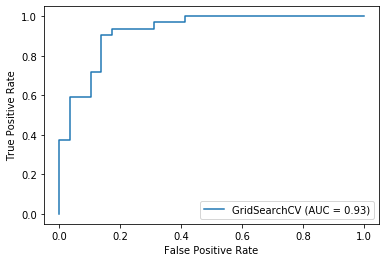

In [67]:
#Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [68]:
#Confusion matrix
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

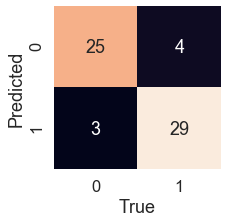

In [72]:
sns.set(font_scale=1.5)

def plot_conf_map(y_test,y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    
plot_conf_map(y_test, y_preds)

In [73]:
print(classification_report(y_test, y_preds)) #only on 1 split

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate metrics using cross validation

It's always more meaningful to provide model accuracy estimates on cross validated data.

In [74]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [76]:
#create new model with those params
clf = LogisticRegression(C=0.20433597178569418, solver ="liblinear")

cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
cv_acc.mean()

0.8446994535519124

In [77]:
#Precision

cv_precision = cross_val_score(clf, X, y, scoring="precision")
cv_precision.mean()

0.8207936507936507

In [78]:
#Recall

cv_recall = cross_val_score(clf, X, y, scoring="recall")
cv_recall.mean()

0.9212121212121213

In [79]:
#F1

cv_f1 = cross_val_score(clf, X, y, scoring="f1")
cv_f1.mean()

0.8673007976269721

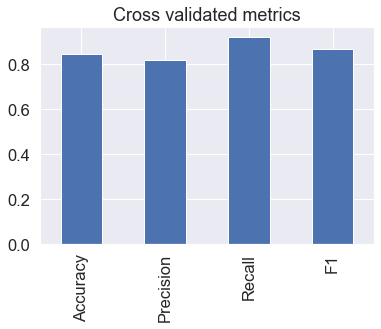

In [82]:
# Visualize CV metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc.mean(),
                          "Precision": cv_precision.mean(),
                          "Recall":cv_recall.mean(),
                          "F1": cv_f1.mean()}, 
                         index=[0])
cv_metrics.T.plot.bar(title="Cross validated metrics", legend=False);

## Feature importance

Which features (parameters) contribute most to the outcomes of the model and how?

In [83]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
clf.coef_ # Extract model coefficients

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [85]:
# Match Coefs to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

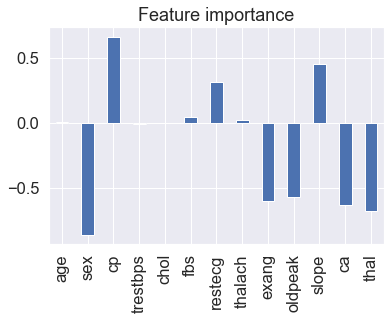

In [86]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False)